# Approximating the Pareto front of a multiobjective optimization problem <br>
In this notebook it is demonstrated how to use the ask() and tell() interface with a multiobjective optimization problem. 

Let us consider a simple example with 1 parameter (x) and 2 objectives f1 and f2 given by the Schaffer function No. 1:

In [1]:
def f1(x):
    return x[0]**2

def f2(x):
    return (x[0]-2)**2

First we initialize an optimizer. Notice that we specify, that there are 2 objectives ( n_objectives=2):

In [2]:
from ProcessOptimizer import Optimizer
import numpy as np
np.random.seed(123)

opt = Optimizer([(-10.0, 10.0)], base_estimator="GP",n_initial_points=10, lhs=True, n_objectives=2)

Next we ask for 15 points. 10 are chosen by LHS. The next 5 are chosen with 25% by Steinerberger sampling (exploration) and with 75% by estimating the Pareto front with the NSGA2 algorithm and then choosing the point in the approximated Pareto front which is the furthest away from previously sampled points (exploitation). The distance is measured in both the parameter and the objective space and a single weigthed measure is combined by the two.

In [3]:
for i in range(15):
    new_point=opt.ask()
    obj1=f1(new_point)
    obj2=f2(new_point)
    obj=[obj1,obj2]
    opt.tell(new_point,obj)

Below the sampled points are shown in both the parameter space (x) and the objective space (f1,f2). Blue points represents samples chosen by LHS and red points are the ones chosen by the Pareto Front procedure

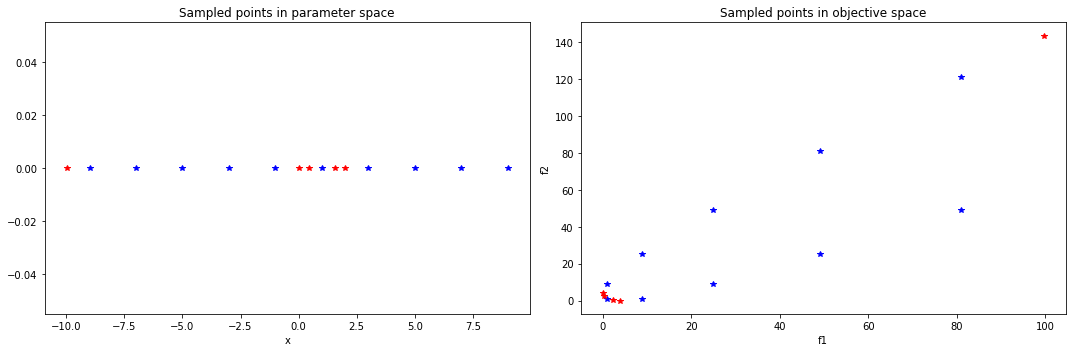

In [4]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].plot(np.array(opt.Xi)[0:10],np.zeros(10), 'b*')
axs[0].plot(np.array(opt.Xi)[10:],np.zeros(5), 'r*')
axs[0].set_title('Sampled points in parameter space')
axs[0].set_xlabel('x')

axs[1].plot(np.array(opt.yi)[0:10,0],np.array(opt.yi)[0:10,1], 'b*')
axs[1].plot(np.array(opt.yi)[10:,0],np.array(opt.yi)[10:,1], 'r*')
axs[1].set_title('Sampled points in objective space')
axs[1].set_xlabel('f1')
axs[1].set_ylabel('f2')


fig.tight_layout()
plt.show()

We can also get the Pareto front by calling the NSGA2 algorithm and plotting it in objective space:

<IPython.core.display.Javascript object>


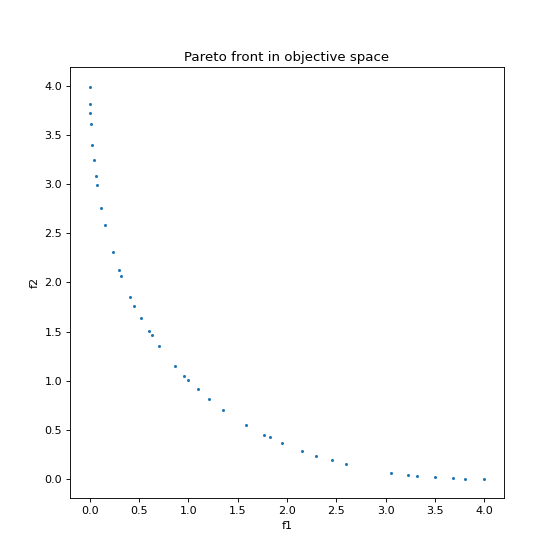

In [20]:
%matplotlib notebook
pop, logbook, front = opt.NSGAII()
pop=np.asarray(pop)
pop = opt.space.inverse_transform(pop.reshape(len(pop),opt.space.transformed_n_dims))


fig,ax = plt.subplots(figsize=(7,7))
sc=plt.scatter(front[:,0],front[:,1], s=3)
plt.title('Pareto front in objective space')


annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

plt.xlabel('f1')
plt.ylabel('f2')

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos

    text=pop[ind["ind"][0]][0]
    text= "x = {:.3f}".format(text)
    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)
plt.show()


Notice that we can get each of these point in the parameter space (ie. their corresponding x value) from the pop object returned by the NSGAII function or by hovering over them in the plot above.